# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
%pip install jupyterthemes

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00


In [3]:
%pip install plotly

In [35]:
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [36]:
dataset_n1 = pd.read_csv("matches.csv")

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [37]:
dataset_n1.tail(5)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1384,38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
1385,39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
1386,40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
1387,41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United
1388,42,2021-05-23,16:00,Premier League,Matchweek 38,Sun,Home,W,1.0,0.0,...,Match Report,NaN,12.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United


In [38]:
dataset_n1.shape

(1389, 28)

In [39]:
dataset_n1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In [40]:
dataset_n1.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,22.771778,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,13.668172,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,11.000000,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,22.000000,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,33.000000,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,59.000000,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


In [41]:
dataset_n1.isnull()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1385,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1386,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1387,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [42]:
dataset_n1.isnull().sum()

,0
Unnamed: 0,0
date,0
time,0
comp,0
round,0
day,0
venue,0
result,0
gf,0
ga,0


In [43]:
dataset_n1 = dataset_n1.drop(columns = ['notes'])

#Dropei a coluna notes proque ela só tem valores nulos

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

In [44]:
dataset_n1['day'] = pd.to_datetime(dataset_n1['date']).dt.day_name()

gols_por_dia = dataset_n1.groupby('day')['gf'].agg(['sum', 'count']).reset_index()
gols_por_dia.columns = ['day', 'total_gols', 'num_jogos']

gols_por_dia['media_gols'] = gols_por_dia['total_gols'] / gols_por_dia['num_jogos']

dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
gols_por_dia['day'] = pd.Categorical(gols_por_dia['day'], categories=dias_da_semana, ordered=True)
gols_por_dia = gols_por_dia.sort_values('day')

In [54]:
dataset_n1.tail() #alterei a coluna dia

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,sh,sot,dist,fk,pk,pkatt,season,team,resultado
1384,38,2021-05-02,19:15,Premier League,Matchweek 34,Sunday,Away,L,0.0,4.0,...,Match Report,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,D
1385,39,2021-05-08,15:00,Premier League,Matchweek 35,Saturday,Home,L,0.0,2.0,...,Match Report,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,D
1386,40,2021-05-16,19:00,Premier League,Matchweek 36,Sunday,Away,W,1.0,0.0,...,Match Report,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,V
1387,41,2021-05-19,18:00,Premier League,Matchweek 37,Wednesday,Away,L,0.0,1.0,...,Match Report,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,D
1388,42,2021-05-23,16:00,Premier League,Matchweek 38,Sunday,Home,W,1.0,0.0,...,Match Report,12.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,V


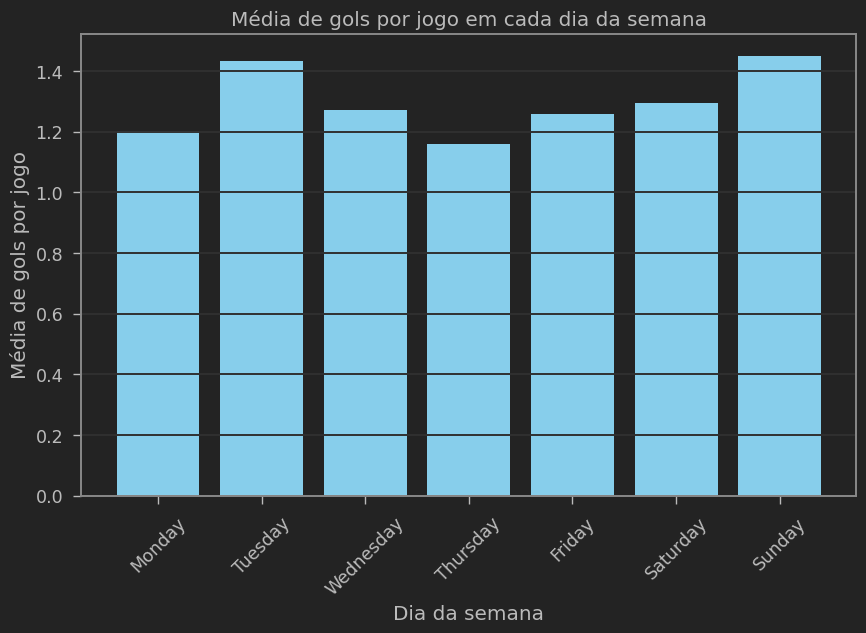

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(gols_por_dia['day'], gols_por_dia['media_gols'], color='skyblue')
plt.title('Média de gols por jogo em cada dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Média de gols por jogo')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

In [46]:
capitaes_por_time = dataset_n1.groupby('team')['captain'].nunique().reset_index()
capitaes_por_time.columns = ['team', 'num_capitaes']

# Verificando os dados
print(capitaes_por_time)

                        team  num_capitaes
0                    Arsenal             6
1                Aston Villa             4
2                  Brentford             2
3   Brighton and Hove Albion             6
4                    Burnley             3
5                    Chelsea             5
6             Crystal Palace             7
7                    Everton             7
8                     Fulham             4
9               Leeds United             2
10            Leicester City             1
11                 Liverpool             5
12           Manchester City             6
13         Manchester United             4
14          Newcastle United             6
15              Norwich City             2
16          Sheffield United             3
17               Southampton             2
18         Tottenham Hotspur             2
19                   Watford             5
20      West Bromwich Albion             4
21           West Ham United             3
22   Wolver

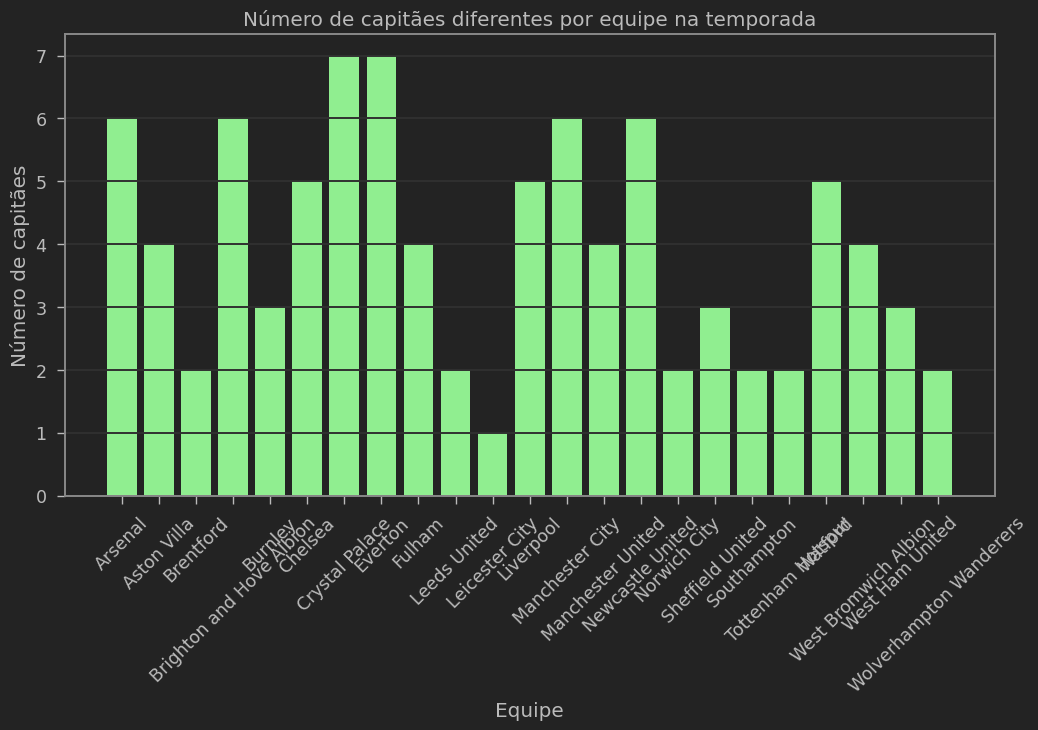

In [56]:
# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(capitaes_por_time['team'], capitaes_por_time['num_capitaes'], color='lightgreen')
plt.title('Número de capitães diferentes por equipe na temporada')
plt.xlabel('Equipe')
plt.ylabel('Número de capitães')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

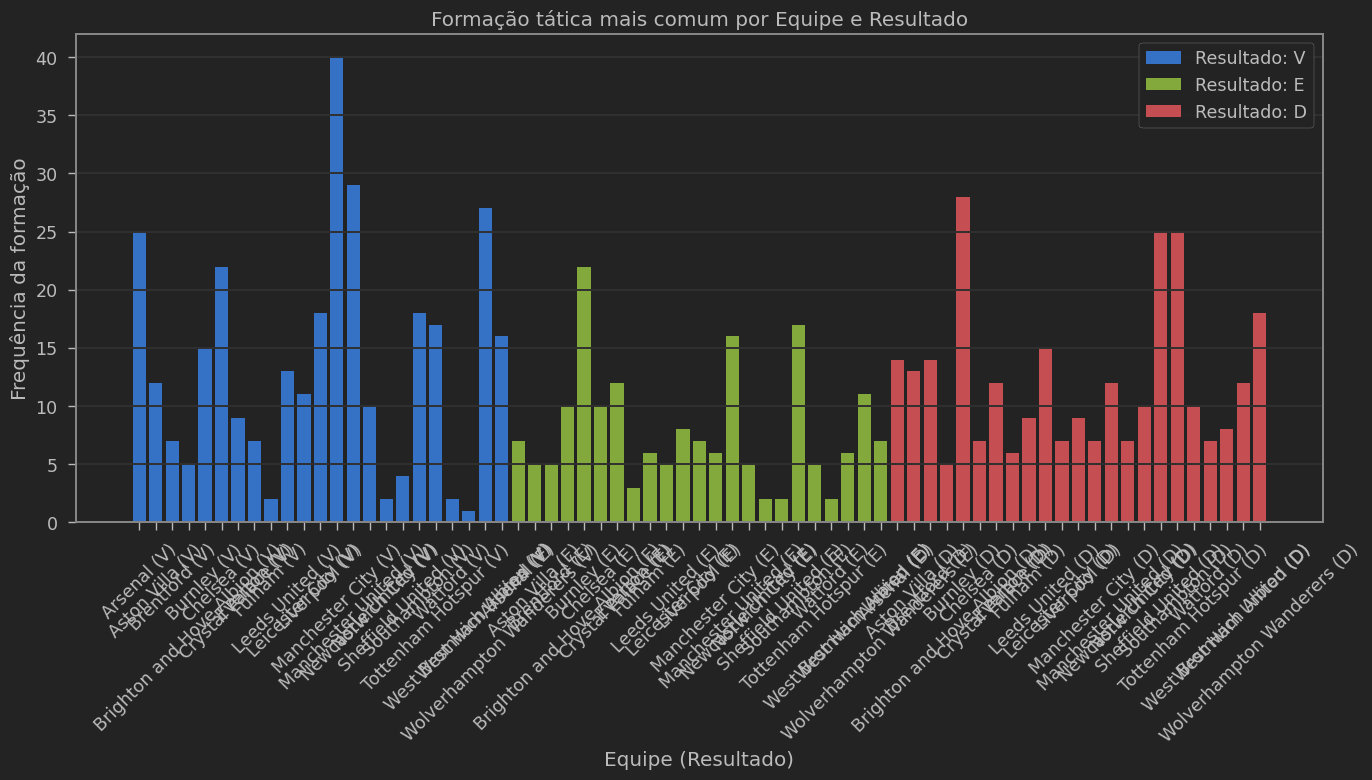

In [57]:
dataset_n1['resultado'] = dataset_n1['result'].apply(lambda x: 'V' if x == 'W' else ('E' if x == 'D' else 'D'))

# Agrupando por equipe, resultado e formação, e contando as frequências
formacao_por_time = dataset_n1.groupby(['team', 'resultado', 'formation']).size().reset_index(name='count')

# Encontrando a formação mais comum para cada equipe e resultado
formacao_mais_comum = formacao_por_time.loc[formacao_por_time.groupby(['team', 'resultado'])['count'].idxmax()]

# Criando um gráfico
plt.figure(figsize=(14, 8))

# Usando um gráfico de barras
for resultado in ['V', 'E', 'D']:
    subset = formacao_mais_comum[formacao_mais_comum['resultado'] == resultado]
    plt.bar(subset['team'] + f' ({resultado})', subset['count'], label=f'Resultado: {resultado}')

plt.title('Formação tática mais comum por Equipe e Resultado')
plt.xlabel('Equipe (Resultado)')
plt.ylabel('Frequência da formação')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

In [58]:
jogos_perdidos = dataset_n1[dataset_n1['result'] == 'L']  # Verifique se 'L' é o código correto para derrota

# Calculando a média de posse de bola por equipe mandante
media_posse_perdidos = jogos_perdidos.groupby('team')['poss'].mean().reset_index()
media_posse_perdidos.columns = ['team', 'media_posse']

print(media_posse_perdidos)

                        team  media_posse
0                    Arsenal    51.875000
1                Aston Villa    49.093750
2                  Brentford    44.250000
3   Brighton and Hove Albion    53.769231
4                    Burnley    41.878788
5                    Chelsea    58.928571
6             Crystal Palace    43.517241
7                    Everton    45.875000
8                     Fulham    51.200000
9               Leeds United    55.400000
10            Leicester City    52.291667
11                 Liverpool    64.333333
12           Manchester City    62.777778
13         Manchester United    50.437500
14          Newcastle United    37.866667
15              Norwich City    44.045455
16          Sheffield United    42.137931
17               Southampton    52.419355
18         Tottenham Hotspur    50.391304
19                   Watford    39.434783
20      West Bromwich Albion    38.681818
21           West Ham United    44.913043
22   Wolverhampton Wanderers    50

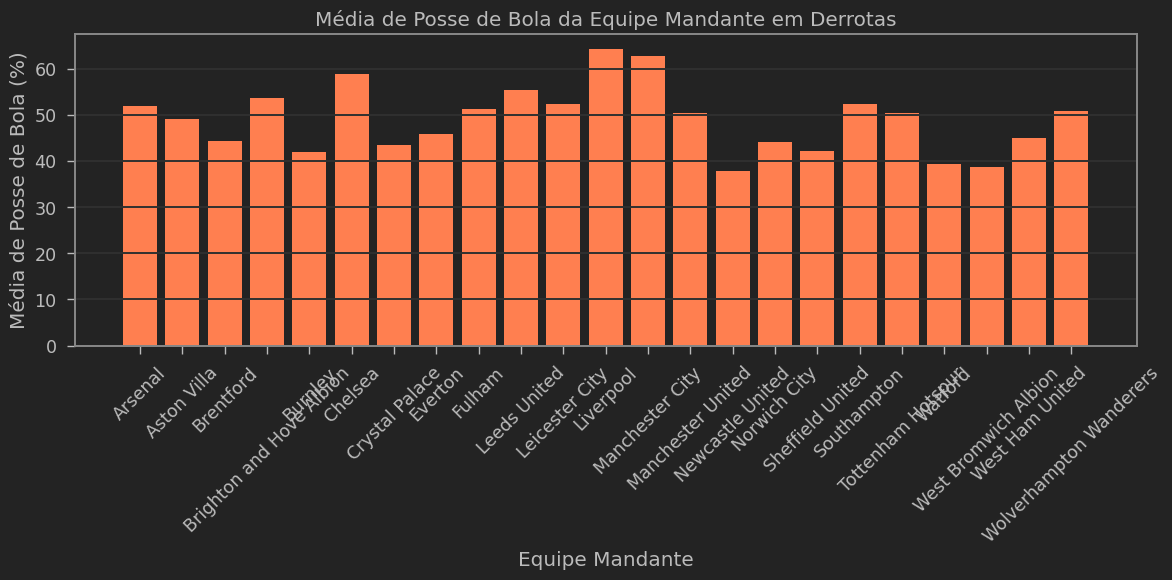

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(media_posse_perdidos['team'], media_posse_perdidos['media_posse'], color='coral')
plt.title('Média de Posse de Bola da Equipe Mandante em Derrotas')
plt.xlabel('Equipe Mandante')
plt.ylabel('Média de Posse de Bola (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [50]:
import requests
from IPython.display import display, HTML

In [60]:
def obter_brasao(time):
    # Normalizando o nome do time para formar a URL
    normalized_name = time.lower().replace(" ", "-").replace("&", "and")
    return f'<img src="https://logodetimes.com/wp-content/uploads/{normalized_name}-football-club.png" width="50" height="50" />'

# Calculo os pontos
classificacao = dataset_n1.groupby('team').agg({'result': lambda x: (x == 'W').sum() * 3 + (x == 'D').sum()}).reset_index()
classificacao.columns = ['team', 'pontos']

# Ordenando pela quantidade de pontos
classificacao = classificacao.sort_values(by='pontos', ascending=False).reset_index(drop=True)

# Adicionando a posição
classificacao['posição'] = classificacao.index + 1

# Adicionando o brasão
classificacao['brasão'] = classificacao['team'].apply(obter_brasao)

tabela_final = classificacao[['posição', 'brasão', 'team', 'pontos']]
display(HTML(tabela_final.to_html(escape=False, index=False)))

posição,brasão,team,pontos
1,,Manchester City,166
2,,Chelsea,132
3,,Manchester United,128
4,,Arsenal,121
5,,Tottenham Hotspur,120
6,,West Ham United,117
7,,Leicester City,108
8,,Wolverhampton Wanderers,94
9,,Leeds United,93
10,,Aston Villa,92


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [62]:
publico_total = dataset_n1.groupby('team')['attendance'].sum().reset_index()
publico_total.columns = ['team', 'publico_total']

# Criando o gráfico de barras com DrillDown
fig = px.bar(publico_total,
             x='team',
             y='publico_total',
             title='Público total por Equipe',
             labels={'publico_total': 'Público total ', 'team': 'Equipe'},
             text='publico_total')

# Adicionando a funcionalidade de DrillDown
def add_drilldown_data(df):
    # Criando um DataFrame para detalhes por jogo
    detalhes = df[['team', 'attendance', 'date']].copy()
    detalhes['detail'] = detalhes['attendance'].astype(str) + " - " + detalhes['date'].astype(str)
    return detalhes[['team', 'attendance', 'detail']]

# Gerando os dados detalhados para cada equipe
detalhes_por_jogo = add_drilldown_data(dataset_n1)

# Usando a biblioteca plotly para adicionar DrillDown
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_title='Equipe', yaxis_title='Público Total')
fig.show()